In [ ]:
###################  IMPLEMENTATION OF LINER REGRESSION  (SCRATCH)    #################################

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 

In [31]:
 # 1. FIT                 # linear Model :   Y = aX + b         [ fit model = find a and b ]
def linearfit(X,Y):
    n = len(X)
    xmean = statistics.mean(X)
    ymean = statistics.mean(Y)
    #  * calculating "a"
    numr = 0
    denom = 0
    for i in range(n):
        numr += ((X[i]*xmean) *(Y[i]*ymean))  # ---> Covarience of (X,Y)
        denom += (X[i]*xmean)**2    #-------> denominator is "varience" of X's distribution
    a = numr/denom
    b = ymean - (a*xmean)
    
    return (a,b)

In [32]:
# 2. PREDICT
def predict(coeffvals,Xtest):  # coeffvals is the Linear model [ i.e contains best coeff values for model line]
    a,b = coeffvals
    Ycap = []
    for i in range(len(Xtest)):
        Ycap.append( b + a * Xtest[i]) 
    return Ycap
        

In [33]:
# 3. evaluate

def rmse(ytrue , ycap):   #scale dependent
    summation =0
    n = len(ytrue)
    for i in range(n):
        summation += (ytrue[i] - ycap[i])**2
        dist = (summation/n)**0.5
    
    return dist

def r_square(ytrue , ycap):    #scale invarient
    ssr = 0
    sst = 0
    ymean = statistics.mean(ytrue)
    for i in range(len(ytrue)):
        ssr += (ycap[i] - ymean)**2
        sst += (ytrue[i] - ymean)**2
        error = ssr/sst
    return error

In [16]:
# test our model with an example

headbraindata  = pd.read_csv("C:\\Users\\saham\\pythonprograms\\headbrain.csv")

print("Dataset view : \n",headbraindata.head(8),"\n")
print("Dataset dimension = ",headbraindata.shape,"\n")
# let head size be X, and predict brain weight Y
print("Independent variables in Data = \n",headbraindata.columns,"\n")
print("Dataset summary : \n",headbraindata.describe(),"\n")
print("Dataset covarien : \n",headbraindata.cov(),"\n")
print("Dataset data types : \n",headbraindata.dtypes,"\n")

Dataset view : 
    Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590
5       1          1             3585                 1300
6       1          1             3785                 1400
7       1          1             3559                 1255 

Dataset dimension =  (237, 4) 

Independent variables in Data = 
 Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object') 

Dataset summary : 
            Gender   Age Range  Head Size(cm^3)  Brain Weight(grams)
count  237.000000  237.000000       237.000000           237.000000
mean     1.434599    1.535865      3633.991561          1282.873418
std      0.496753    0.499768       365.261422           120.340446
m

In [7]:
X = headbraindata['Head Size(cm^3)'].values
Y = headbraindata['Brain Weight(grams)'].values

## test and train data
len(X)
xtrain = X[:200]
ytrain = Y[:200]



In [43]:
xtest = X[200:]
ytest = Y[200:]

In [44]:
print("xtrain = ",len(xtrain),"  xtest = ",len(xtest), "  X =  ",len(X))

xtrain =  200   xtest =  37   X =   237


In [45]:
lm = linearfit(xtrain ,ytrain)
predictions_y = predict(lm,xtest)

rms = rmse(ytest,predictions_y)
print("RMSE = ",rms)
r2 = r_square(ytest , predictions_y)
print("r square = ",r2)

RMSE =  104.25466559368354
r square =  0.5146584952628586


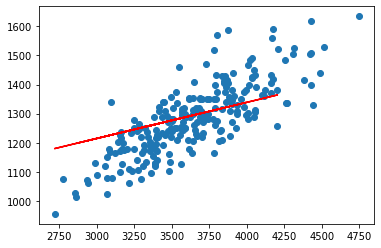

In [52]:
plt.scatter(X,Y)
plt.plot(xtest,predictions_y,'r')